In [1]:
%matplotlib inline

In [2]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model
from datetime import datetime
from sklearn_pandas import DataFrameMapper
import warnings
import timeit
from collections import defaultdict
import tabulate
import time
import GPy
from IPython.display import display

timeit.template = """
def inner(_it, _timer{init}):
    {setup}
    _t0 = _timer()
    for _i in _it:
        retval = {stmt}
    _t1 = _timer()
    return _t1 - _t0, retval
"""

matplotlib.style.use('ggplot')

RANDOM_SEED = 33

## Sample data fitting

A sum of two sins + some Gaussian noise

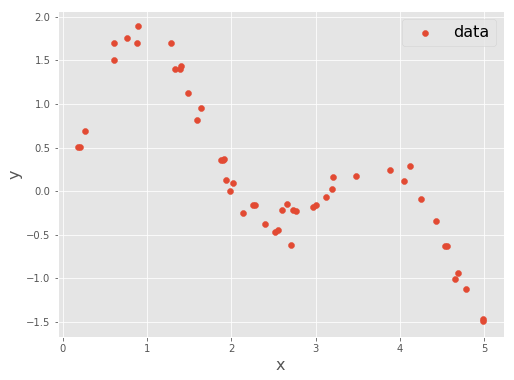

In [3]:
def generate_data(x):
    n = len(x) if hasattr(x, '__len__') else 1
    return np.sin(x) + np.sin(2 * x) + np.random.normal(0, 0.1, n)

def plot_data_set(x, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label='data')
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('x', size=16)
    plt.ylabel('y' , size=16)
    plt.show()
    
x = np.random.uniform(0., 5., (50, ))
y = generate_data(x)    
plot_data_set(x, y)

With first 5 data points:


 /Users/guydavidson/anaconda/lib/python3.6/site-packages/GPy/core/gp.py:562: RuntimeWarning:covariance is not positive-semidefinite.


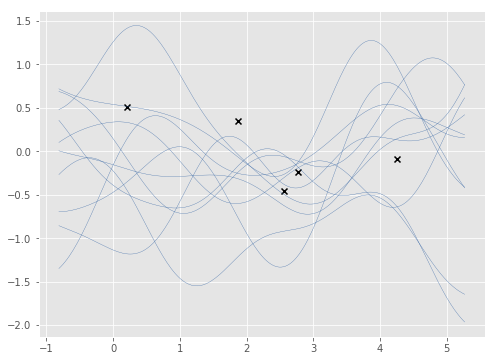

With first 10 data points:


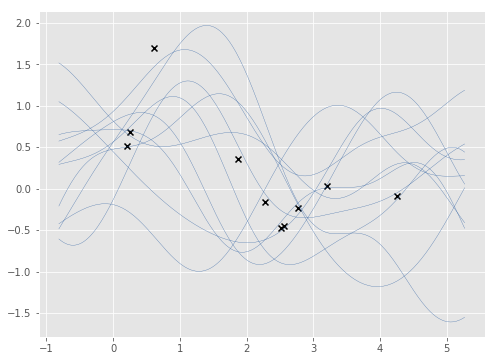

With first 15 data points:


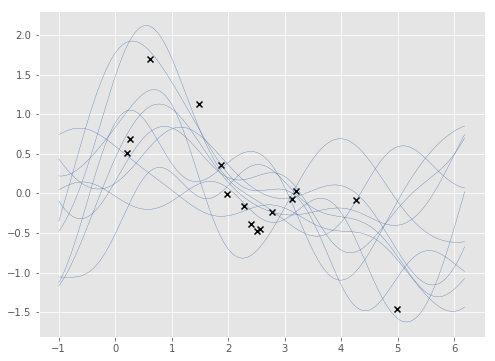

With first 20 data points:


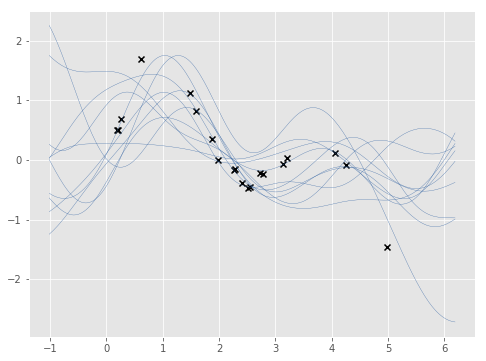

With first 25 data points:


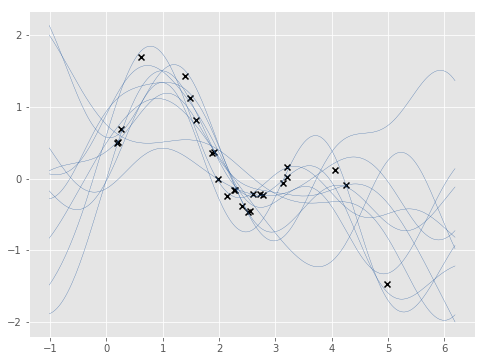

With first 30 data points:


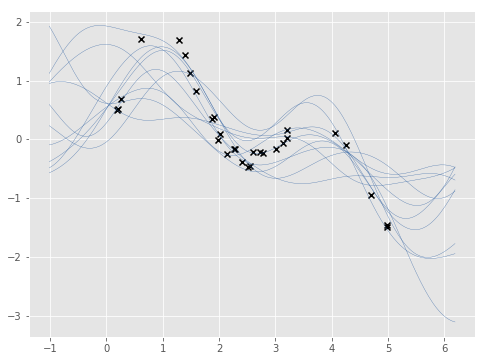

With first 35 data points:


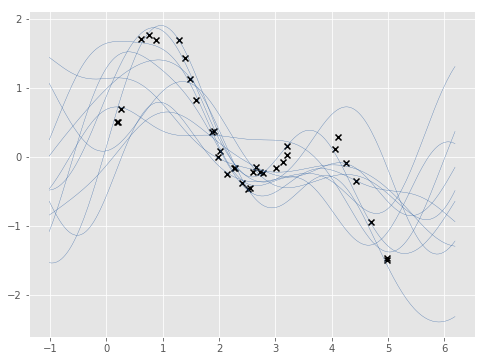

With first 40 data points:


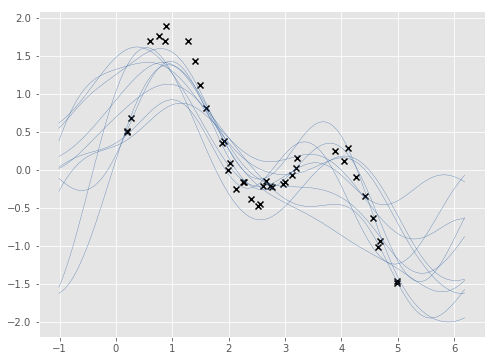

With first 45 data points:


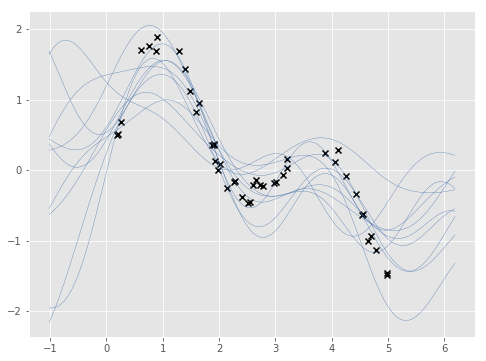

With first 50 data points:


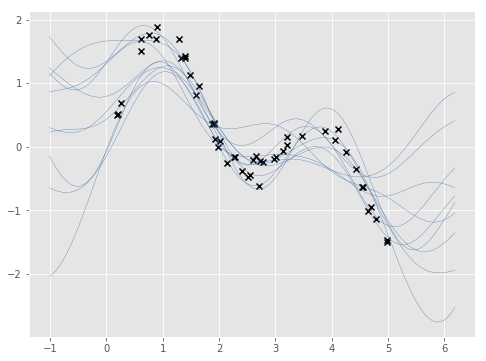

In [4]:
def plot_samples_with_data(model):
    fig = plt.figure(figsize=(8, 6))
    fig.gridspec = plt.GridSpec(1, 1)
    model.plot_data(figure=fig)
    model.plot_samples(samples=10, figure=fig)
    plt.show()

kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(x[:5].reshape((-1, 1)), y[:5].reshape((-1, 1)), kernel)

print('With first 5 data points:')
plot_samples_with_data(model)

# GPy.plotting.show(fig, filename='basic_gp_regression_notebook')

for i in range(10, len(x) + 1, 5):
    time.sleep(5)
    print('With first {i} data points:'.format(i=i))
    model.set_XY(x[:i].reshape((-1, 1)), y[:i].reshape((-1, 1)))
    plot_samples_with_data(model)



Before optimizing:
After optimizing:


 /Users/guydavidson/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


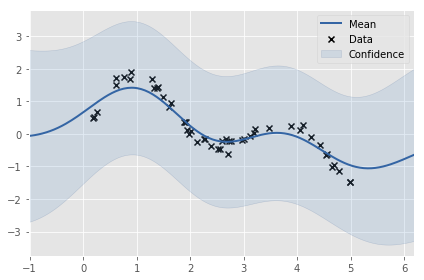

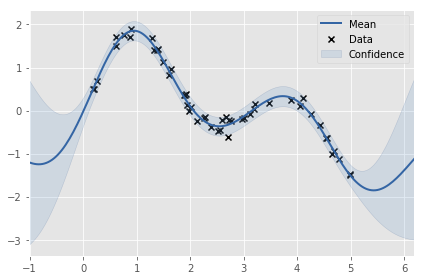

In [5]:
print('Before optimizing:')
model.plot()
print('After optimizing:')
model.optimize()
model.plot()

## Manua Loa $CO_2$ Data

In [6]:
from sklearn.datasets import fetch_mldata

data = fetch_mldata('mauna-loa-atmospheric-co2').data
X = data[:, [1]]
y = data[:, 0].reshape((-1, 1))

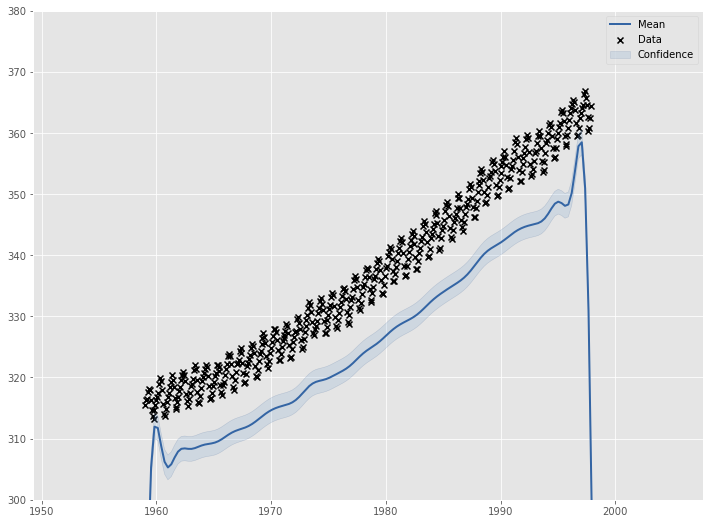

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [7]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X, y, kernel)
fig = plt.figure(figsize=(12, 9))
fig.gridspec = plt.GridSpec(1, 1)
axes = model.plot(figure=fig)
axes.set_ylim(300, 380)
plt.show()
display(model)

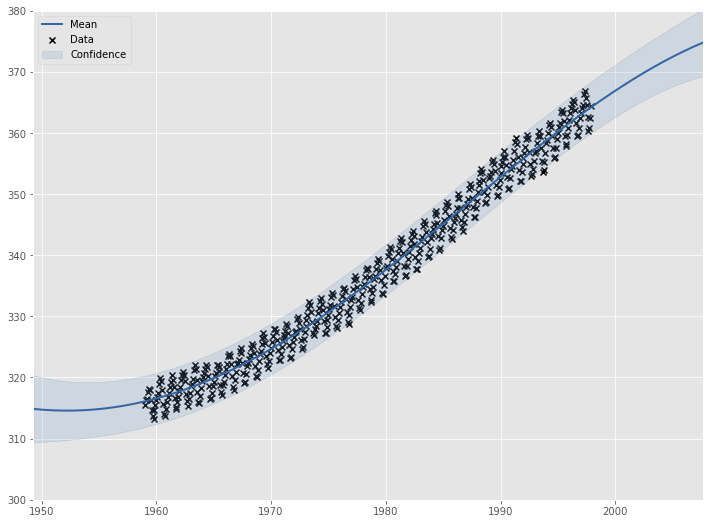

GP_regression.,value,constraints,priors
rbf.variance,82518.3626369,+ve,
rbf.lengthscale,70.6493018324,+ve,
Gaussian_noise.variance,4.4477057037,+ve,


In [8]:
model.optimize()
fig = plt.figure(figsize=(12, 9))
fig.gridspec = plt.GridSpec(1, 1)
axes = model.plot(figure=fig)
axes.set_ylim(300, 380)
plt.show()
display(model)

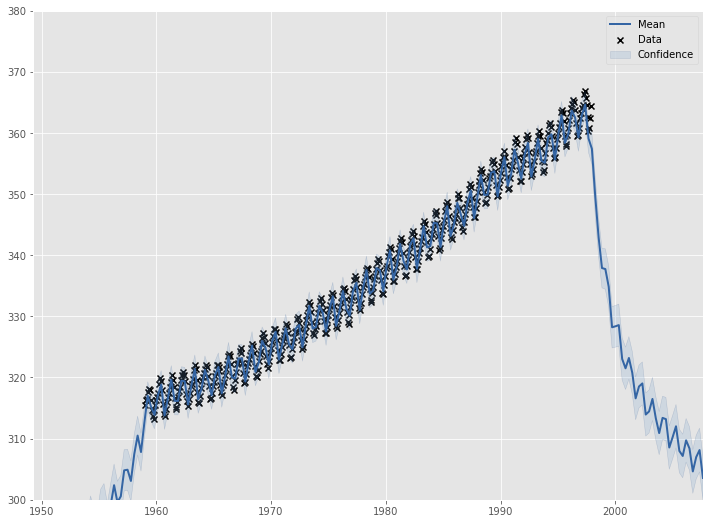

GP_regression.,value,constraints,priors
sum.rbf.variance,1.0,+ve,
sum.rbf.lengthscale,67.0,+ve,
sum.mul.rbf.variance,1.0,+ve,
sum.mul.rbf.lengthscale,90.0,+ve,
sum.mul.std_periodic.variance,1.0,+ve,
sum.mul.std_periodic.period,1.0,+ve,
sum.mul.std_periodic.lengthscale,1.3,+ve,
sum.RatQuad.variance,1.0,+ve,
sum.RatQuad.lengthscale,1.2,+ve,
sum.RatQuad.power,0.78,+ve,


In [9]:
# Kernel with parameters given in GPML book
k1 = GPy.kern.RBF(input_dim=1, lengthscale=67.0)  # long term smooth rising trend 
k2 = GPy.kern.RBF(input_dim=1, lengthscale=90.0) \
    * GPy.kern.StdPeriodic(input_dim=1, lengthscale=1.3, period=1.0)  # seasonal component
k3 = GPy.kern.RatQuad(input_dim=1, lengthscale=1.2, power=0.78) # medium term irregularity
k4 = GPy.kern.RBF(input_dim=1, lengthscale=0.134) \
    + GPy.kern.White(input_dim=1, variance=0.19**2)  # noise terms
kernel_gpml = k1 + k2 + k3 + k4

model = GPy.models.GPRegression(X, y, kernel_gpml)
fig = plt.figure(figsize=(12, 9))
fig.gridspec = plt.GridSpec(1, 1)
axes = model.plot(figure=fig)
axes.set_ylim(300, 380)
plt.show()
display(model)

 /Users/guydavidson/anaconda/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:123: RuntimeWarning:overflow encountered in true_divide
 /Users/guydavidson/anaconda/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:124: RuntimeWarning:invalid value encountered in sin
 /Users/guydavidson/anaconda/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:124: RuntimeWarning:overflow encountered in square
 /Users/guydavidson/anaconda/lib/python3.6/site-packages/GPy/kern/src/stationary.py:167: RuntimeWarning:overflow encountered in true_divide
 /Users/guydavidson/anaconda/lib/python3.6/site-packages/GPy/kern/src/stationary.py:628: RuntimeWarning:overflow encountered in square
 /Users/guydavidson/anaconda/lib/python3.6/site-packages/paramz/transformations.py:108: RuntimeWarning:invalid value encountered in greater
 /Users/guydavidson/anaconda/lib/python3.6/site-packages/paramz/transformations.py:113: RuntimeWarning:invalid value encountered in greater


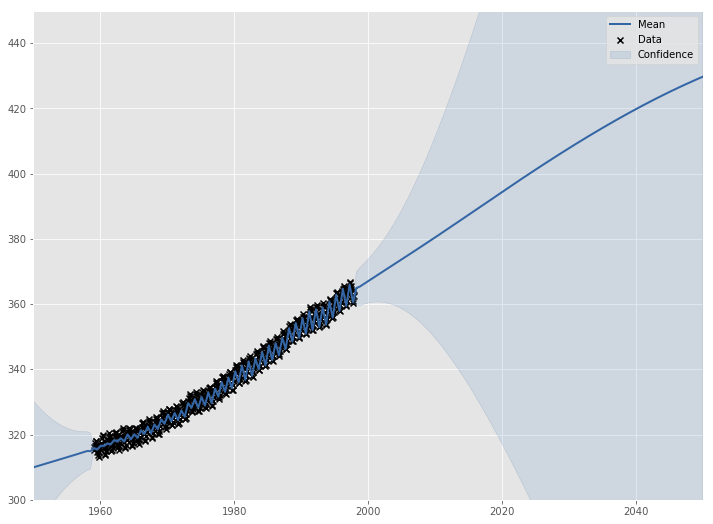

GP_regression.,value,constraints,priors
sum.rbf.variance,1.82013419762e-110,+ve,
sum.rbf.lengthscale,66.1560467487,+ve,
sum.mul.rbf.variance,1296.16501397,+ve,
sum.mul.rbf.lengthscale,115.039488051,+ve,
sum.mul.std_periodic.variance,1296.16501393,+ve,
sum.mul.std_periodic.period,213.888611271,+ve,
sum.mul.std_periodic.lengthscale,300.369614115,+ve,
sum.RatQuad.variance,267.267070096,+ve,
sum.RatQuad.lengthscale,142.40924314,+ve,
sum.RatQuad.power,103.367789187,+ve,


In [10]:
model.optimize()
fig = plt.figure(figsize=(12, 9))
fig.gridspec = plt.GridSpec(1, 1)
axes = model.plot(plot_limits=np.array([1950, 2050]), figure=fig)
axes.set_ylim(300, 450)
plt.show()
display(model)